# Comparing methane levels with other trace gases

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('sarp_data_09_21.csv', sep=',')
data = data.drop(3738)

In [25]:
# Drop columns where Latitude or Longitude are nan
data = data[data['Ethane (E)'].notna()]
data = data[data['CH4 (ppmv)'].notna()]
# Replace both nan values with np.nan
data = data.replace({-999: np.nan, -888: np.nan})

In [57]:
MAXALT = 2000
MINALT = 1000
#isolate LA area data
la = data[(data['Latitude']>=33.5) & (data['Latitude']<=34) & (data['Longitude']>=-118.5) & (data['Longitude']<=-118)]
#isolate summer 2017-2019 flights, w/out missed approaches
lasummer = la[(la['Julian Open Time']>42800) & (la['Julian Open Time']<44000) & (la['AltP_feet']>=MINALT) & (la['AltP_feet']<=MAXALT)]
#isolate winter 2021 flights, w/out missed aproaches
lawinter = la[(la['Julian Open Time']>44000) & (la['AltP_feet']>=MINALT) & (la['AltP_feet']<=MAXALT)]
#san bernardino area
sb = data[(data['Latitude']>=33.75) & (data['Latitude']<=34.25) & (data['Longitude']>=-117.5) & (data['Longitude']<=-117)]
#san bernardino summer
sbsummer = sb[(sb['Julian Open Time']>42800) & (sb['Julian Open Time']<44000) & (sb['AltP_feet']>=MINALT) & (sb['AltP_feet']<=MAXALT)]
#san bernardino winter
sbwinter = sb[(sb['Julian Open Time']>44000) & (sb['AltP_feet']>=MINALT) & (sb['AltP_feet']<=MAXALT)]

In [64]:
#la missed approaches 
lama = la[la['AltP_feet']<500]
lama

,Snake#,Can#,Flight,Flight or Ground,Location,Type,State,Box,Jday,date,...,4-Ethyltoluene (MS),2-Ethyltoluene (MS),"1,3,5-Trimethylbenzene (MS)","1,2,4-Trimethylbenzene (MS)","1,2,3-Trimethylbenzene (MS)",alpha-Pinene (MS),beta-Pinene (MS),Unnamed: 124,Propane (E/B).1,n-Butane (E).1
542,2601,4264,3,Flight,NaN,NaN,NaN,NaN,179.0,6/28/2011,...,NaN,4.0,NaN,7.0,6.0,NaN,NaN,NaN,591.000000,165.000000
681,4007,7186,5,Flight,NaN,NaN,NaN,NaN,181.0,6/30/2011,...,4.0,11.0,5.0,15.0,11.0,NaN,NaN,NaN,631.000000,108.000000
682,4010,6089,5,Flight,NaN,NaN,NaN,NaN,181.0,6/30/2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421.000000,85.000000
683,4023,5002,5,Flight,NaN,NaN,NaN,NaN,181.0,6/30/2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.000000,76.000000
684,4008,7169,5,Flight,NaN,NaN,NaN,NaN,181.0,6/30/2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.000000,53.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0417,6186,Flight 05,Flight,NaN,NaN,NaN,NaN,344.0,12/10/2021,...,10.0,6.0,5.0,17.0,8.0,0.0,0.0,NaN,2189.068905,1257.534310
3549,0402,7051,Flight 05,Flight,NaN,NaN,NaN,NaN,344.0,12/10/2021,...,9.0,6.0,8.0,18.0,8.0,0.0,0.0,NaN,1908.751717,1033.948378
3550,0415,6312,Flight 05,Flight,NaN,NaN,NaN,NaN,344.0,12/10/2021,...,5.0,4.0,3.0,15.0,4.0,5.0,0.0,NaN,1424.485675,678.355833
3551,0418,4195,Flight 05,Flight,NaN,NaN,NaN,NaN,344.0,12/10/2021,...,4.0,0.0,0.0,8.0,4.0,3.0,0.0,NaN,1177.839942,509.132839


In [94]:
#Plot ratios and line of best fit 
def ratios(data):
    y=data['Ethane (E)']/1000
    x=data['CH4 (ppmv)']
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_axisbelow(True)
    ax.grid()
    ax.set_title('Methane vs. Ethane Ratios')
    ax.set_ylabel('Ethane (ppb)')
    ax.set_xlabel('Methane (ppmv)')
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x+b)
    print('Slope = ', a)
    

Slope =  21.13934986860585
Slope =  29.136412175909975


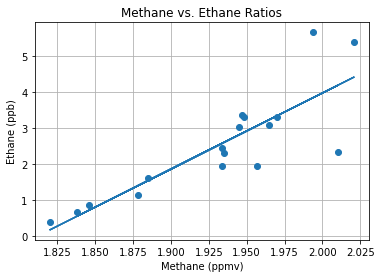

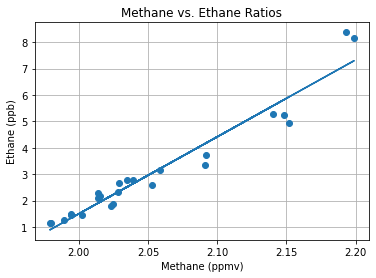

In [95]:
ratios(lasummer)
ratios(lawinter)

Slope =  15.876313745956205
Slope =  14.598819478294411


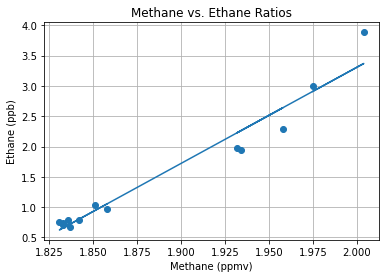

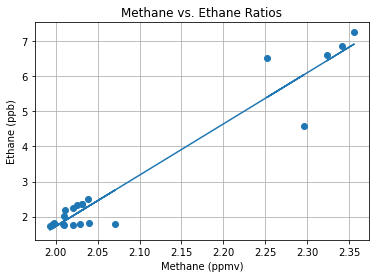

In [96]:
ratios(sbsummer)
ratios(sbwinter)

In [104]:
#Plot ratios and line of best fit 
def ratios_co(data):
    y=data['CO (ppbv)']
    x=data['CH4 (ppmv)']
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_axisbelow(True)
    ax.grid()
    ax.set_title('Methane vs. CO Ratios')
    ax.set_ylabel('CO (ppb)')
    ax.set_xlabel('Methane (ppmv)')
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x+b)
    print('Slope = ', a)

Slope =  801.4327369595767
Slope =  800.9560906946753


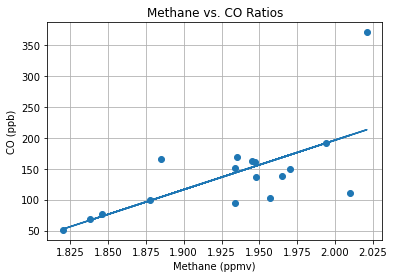

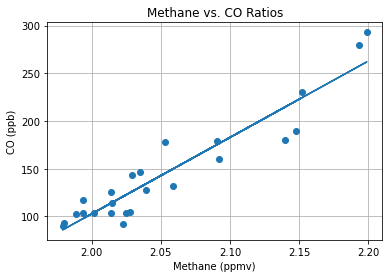

In [105]:
ratios_co(lasummer)
ratios_co(lawinter)

Slope =  925.7275708236008
Slope =  742.17890644883


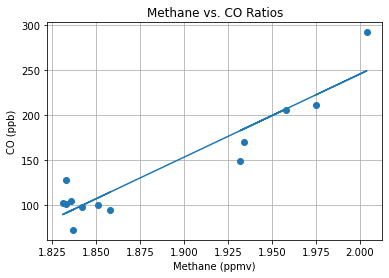

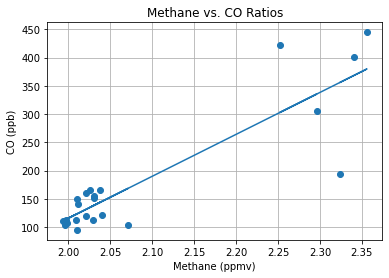

In [106]:
ratios_co(sbsummer)
ratios_co(sbwinter)

In [97]:
#Plot ratios and line of best fit 
def ratio_benz(data):
    y=data['Benzene (E/MS)']/1000
    x=data['CH4 (ppmv)']
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_axisbelow(True)
    ax.grid()
    ax.set_title('Methane vs. Benzene Ratios')
    ax.set_ylabel('Benzene (ppb)')
    ax.set_xlabel('Methane (ppmv)')
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x+b)
    print('Slope = ', a)

Slope =  0.6751862918031627
Slope =  0.6493136773814909


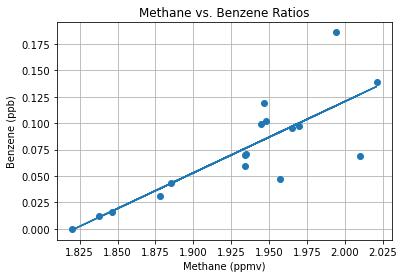

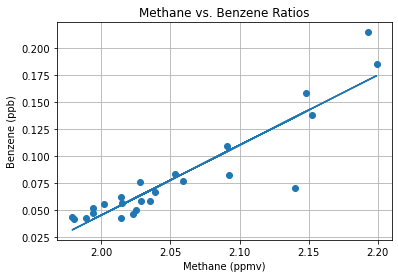

In [98]:
ratio_benz(lasummer)
ratio_benz(lawinter)

Slope =  0.982689834915226
Slope =  0.4672839595737454


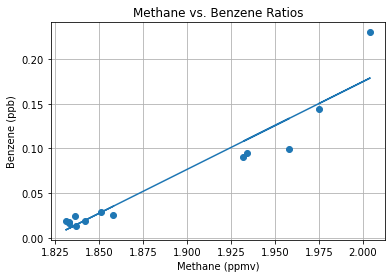

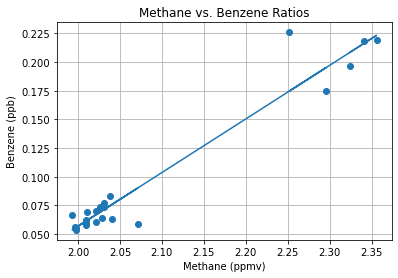

In [99]:
ratio_benz(sbsummer)
ratio_benz(sbwinter)

In [100]:
#Plot ratios and line of best fit 
def ratio_but(data):
    y=data['n-Butane (E)']/1000
    x=data['CH4 (ppmv)']
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_axisbelow(True)
    ax.grid()
    ax.set_title('Methane vs. Butane Ratios')
    ax.set_ylabel('Butane (ppb)')
    ax.set_xlabel('Methane (ppmv)')
    a, b = np.polyfit(x, y, 1)
    plt.plot(x, a*x+b)
    print('Slope = ', a)

Slope =  7.299236833579344
Slope =  16.98412441355429


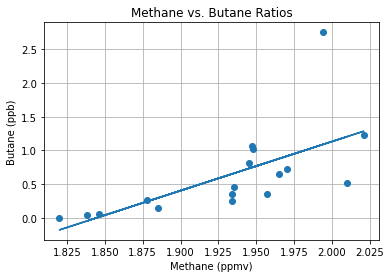

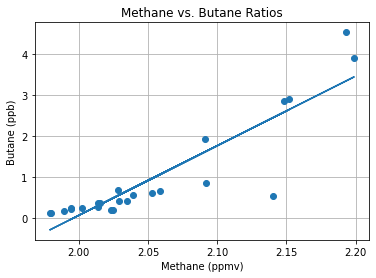

In [101]:
ratio_but(lasummer)
ratio_but(lawinter)

Slope =  3.359714096183653
Slope =  4.457192951221909


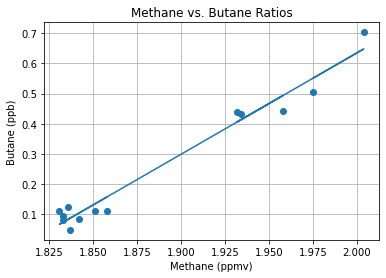

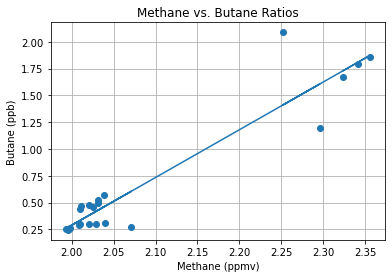

In [102]:
ratio_but(sbsummer)
ratio_but(sbwinter)